In [1]:
!pip install pandas bs4 seaborn

In [2]:
!wget https://raw.githubusercontent.com/kmsaumcis/mcis6273_f19_datamining/master/homework/data/openpowerlifting-2019-10-24.csv

--2019-12-10 10:00:37--  https://raw.githubusercontent.com/kmsaumcis/mcis6273_f19_datamining/master/homework/data/openpowerlifting-2019-10-24.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85430272 (81M) [text/plain]
Saving to: ‘openpowerlifting-2019-10-24.csv.1’

openpowerlifting-20 100%[===================>]  81.47M   287MB/s    in 0.3s    

2019-12-10 10:00:39 (287 MB/s) - ‘openpowerlifting-2019-10-24.csv.1’ saved [85430272/85430272]



In [0]:
%matplotlib inline
import pandas as pd
import requests
import matplotlib.pyplot as plt


In [0]:
df = pd.read_csv("openpowerlifting-2019-10-24.csv", low_memory=False)

In [5]:
df.shape


(489510, 38)

In [6]:
df.Division.value_counts()


Open                172332
Boys                129540
Juniors              11347
Novice                6832
M-C-Open              6605
                     ...  
Submasters 33-45         1
N4                       1
Law & Military           1
M 95-99                  1
Teen 18                  1
Name: Division, Length: 1329, dtype: int64

In [7]:
df.Division.value_counts()[10:35]


Juniors 20-23     4253
M-O               4130
Sub-Juniors       4096
Teen              3903
Masters 45-49     3876
High School       3236
Teen 16-17        3099
F-C-Open          3043
Teen 18-19        3026
F-OR              2872
Masters 50-54     2720
Submasters        2679
Masters           2256
Masters 3         2195
MR-O              2054
Varsity           1893
Class II          1846
M-E-Open          1788
Masters 55-59     1782
F-O               1350
Junior Varsity    1303
Masters 60-64     1190
Masters 40-49     1169
Natural           1158
Pure              1155
Name: Division, dtype: int64

In [8]:
df.shape


(489510, 38)

1.1.1 correct use of dropna()

In [9]:
df.dropna(subset=['Age', 'Division'])

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,Bench4Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,Best3DeadliftKg,TotalKg,Place,Wilks,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
0,Abbie Murphy,F,SBD,Wraps,29.0,24-34,NaN,F-OR,59.80,60,80.0,92.5,105.0,NaN,105.00,45.0,50.0,55.0,NaN,55.00,110.0,120.0,130.0,NaN,130.00,290.00,4,324.16,324.16,286.42,511.15,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
1,Abbie Tuong,F,SBD,Wraps,29.0,24-34,NaN,F-OR,58.50,60,100.0,110.0,120.0,NaN,120.00,55.0,62.5,67.5,NaN,67.50,130.0,140.0,145.0,NaN,145.00,332.50,2,378.07,378.07,334.16,595.65,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
2,Ainslee Hooper,F,B,Raw,40.0,40-44,40-49,F-OR,55.40,56,NaN,NaN,NaN,NaN,NaN,27.5,32.5,-35.0,NaN,32.50,NaN,NaN,NaN,NaN,NaN,32.50,1,38.56,38.56,34.12,313.97,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
3,Amy Moldenhauer,F,SBD,Wraps,23.0,20-23,NaN,F-OR,60.00,60,-105.0,-105.0,105.0,NaN,105.00,67.5,72.5,-75.0,NaN,72.50,132.5,-140.0,-140.0,NaN,132.50,310.00,3,345.61,345.61,305.37,547.04,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
4,Andrea Rowan,F,SBD,Wraps,45.0,45-49,40-49,F-OR,104.00,110,120.0,130.0,140.0,NaN,140.00,70.0,75.0,80.0,NaN,80.00,150.0,160.0,170.0,NaN,170.00,390.00,3,321.25,338.91,274.56,550.08,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489457,Eddie Lopez,M,SBD,Single-ply,13.5,13-15,NaN,Boys,112.94,124.7,NaN,NaN,NaN,NaN,210.92,NaN,NaN,NaN,NaN,133.81,NaN,NaN,NaN,NaN,183.70,528.44,3,308.58,379.55,295.18,386.02,Yes,NaN,THSPA,2011-01-08,USA,TX,UTSA High School Powerfest Final Results
489460,Joe Aguero,M,SBD,Single-ply,15.5,16-17,14-18,Boys,120.79,124.7,NaN,NaN,NaN,NaN,208.65,NaN,NaN,NaN,NaN,97.52,NaN,NaN,NaN,NaN,195.04,501.22,6,287.73,325.13,275.72,357.33,Yes,NaN,THSPA,2011-01-08,USA,TX,UTSA High School Powerfest Final Results
489468,Zachary Moreno,M,SBD,Single-ply,13.5,13-15,14-18,Boys,114.31,124.7,NaN,NaN,NaN,NaN,147.42,NaN,NaN,NaN,NaN,111.13,NaN,NaN,NaN,NaN,145.15,403.70,14,234.95,288.99,224.85,305.64,Yes,NaN,THSPA,2011-01-08,USA,TX,UTSA High School Powerfest Final Results
489475,Mark Alarcon,M,SBD,Single-ply,16.5,16-17,14-18,Boys,136.67,124.7+,NaN,NaN,NaN,NaN,215.46,NaN,NaN,NaN,NaN,124.74,NaN,NaN,NaN,NaN,195.04,535.24,2,300.20,324.22,285.83,357.56,Yes,NaN,THSPA,2011-01-08,USA,TX,UTSA High School Powerfest Final Results


1.1.2 output of the original dimensions of the data using DataFrame.shape or something similar that shows the
original and new dimensions of the data

In [10]:
df.shape

(489510, 38)

In [11]:
df = df.dropna(subset=['Age', 'Division'])
df.shape

(187846, 38)

1.2.1 use of pandas.datetime to convert the Date column of your data to datetime (hint: use loc to set the data)

In [0]:
df.Date = pd.to_datetime(df.Date, errors='coerce')

1.2.2 that the column has changed by using DataFrame.dtype or alternatively use DataFrame.head() which will show the data type in its output.

In [13]:
df.Date.head()

0   2018-10-27
1   2018-10-27
2   2018-10-27
3   2018-10-27
4   2018-10-27
Name: Date, dtype: datetime64[ns]

1.3.1 use of query() to restrict your data to competitors 21 and older in competitions from 1999 to 2018

In [0]:
df = df.query('Age >= 21 & Date>=1998 & Date<=2018')

1.3.2 use of groupby showing the mean() values for each column with groups being (in order) Date (year),
AgeClass and Sex.

In [0]:
df.Date = pd.Series(df.Date).dt.to_period('Y')

In [16]:
df.groupby(['Date', 'AgeClass', 'Sex']).mean().loc[:]

Age  BodyweightKg  ...  Glossbrenner   IPFPoints
Date AgeClass Sex                           ...                          
1998 20-23    F    21.779661     63.595690  ...    274.107593  499.526111
              M    22.131868     88.940167  ...    349.932761  531.481963
     24-34    F    28.500000     62.112088  ...    292.021548  526.692857
              M    29.349123     97.835009  ...    326.997328  566.518134
     35-39    F    37.206897     65.904808  ...    311.839796  520.635510
...                      ...           ...  ...           ...         ...
2017 70-74    M    71.921642     82.244697  ...    151.618810  390.918083
     75-79    F    77.750000     52.925000  ...    124.955000  414.166000
              M    77.206897     78.452586  ...    127.583036  363.518727
     80-999   F    81.187500     60.163750  ...     84.090000  414.188333
              M    83.433333     71.658621  ...    102.303704  357.388846

[438 rows x 22 columns]

1.4.1 an area plot showing the male data grouped by age and year, that is the x-axis will show the year and the y-axis the Glossbrenner score

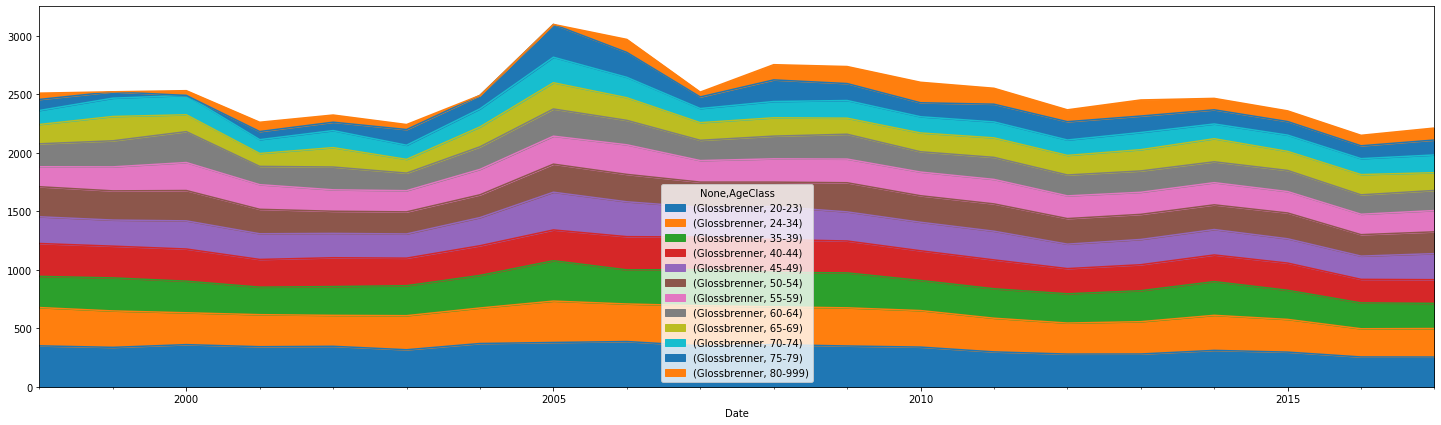

In [17]:
mdf = df.query('Sex=="M"').groupby(['Date', 'AgeClass', 'Sex']).mean().loc[:,['Glossbrenner']]
mdf = mdf.droplevel(level=2)
mdf.unstack().plot.area(figsize=(25,7))

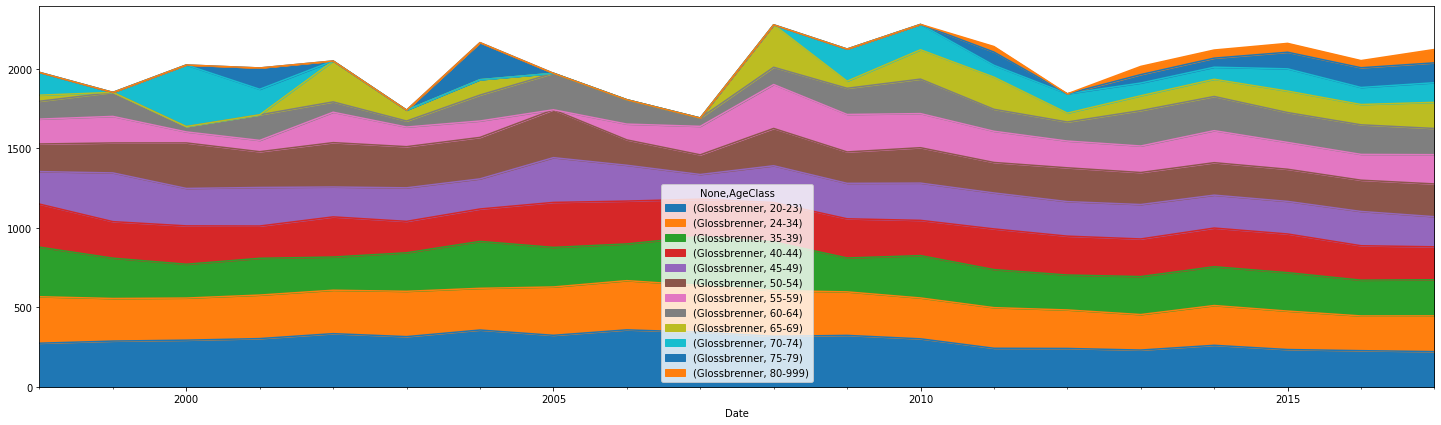

In [18]:
fdf = df.query('Sex=="F"').groupby(['Date', 'AgeClass', 'Sex']).mean().loc[:,['Glossbrenner']]
fdf = fdf.droplevel(level=2)
fdf.unstack().plot.area(figsize=(25,7))

Observations:

For males
* Above age 45 the relative strength seems to be 
almost same throught the history
* Below age 45 the relative strength has been fluctuating, with the peak streangth observed in 2005.

For females
* Above age 45 the relative strength seems to be 
almost same throught the history
* Below age 45 the relative strength fluctuates a lot. 